In [503]:
# Importing packages.

import math as math
import numpy as np
import matplotlib.pyplot as plt

In [560]:
# Read the LHE lines.

gg_file = open('./CrossFiles/01ggcoupling.txt', 'r')
gq_file = open('./CrossFiles/01gqcoupling.txt', 'r')

gg_lines = gg_file.readlines()
gq_lines = gq_file.readlines()

gg_file.close()
gq_file.close()

print(len(gg_lines))

422


In [561]:
# Make array with gg_cross.txt.

gg_cross = []

i = 0    # counter

for line in enumerate(gg_lines):
    gg_cross.append(line[1])
    gg_cross[i] = float(gg_cross[i])
    i = i + 1
    
print(gg_cross[0])

0.0007922723236981009


In [562]:
# Make array with gq_cross.txt

spaces = []       # where the spaces are in each line.       
first, second, third, fourth, fifth, sixth = [], [], [], [], [], []         # the cross section for each quark flavour.

gq_cross = []

for line in enumerate(gq_lines):

    for i in range(len(line[1])):

        if line[1][i] == ' ':

            spaces.append(i)
        
i = 0                # counter

while i < (len(spaces)): 
    
    first.append(spaces[i]) 
    second.append(spaces[i+1]) 
    third.append(spaces[i+2]) 
    fourth.append(spaces[i+3]) 
    fifth.append(spaces[i+4]) 
    sixth.append(spaces[i+5]) 
    
    i = i + 6

q1, q2, q3, q4, q5 = [], [], [], [], []

i = 0                # counter

for line in enumerate(gq_lines): 
    
    q1.append(line[1][0 : first[i]])
    q1[i] = float(q1[i])
    
    q2.append(line[1][first[i]+1 : second[i]])
    q2[i] = float(q2[i])
    
    q3.append(line[1][second[i]+1 : third[i]])
    q3[i] = float(q3[i])
    
    q4.append(line[1][third[i]+1 : fourth[i]])
    q4[i] = float(q4[i])
    
    q5.append(line[1][fourth[i]+1 : fifth[i]])
    q5[i] = float(q5[i])
 
    gq_cross.append(q1[i] + q2[i] + q3[i] + q4[i] + q5[i])

    i = i + 1
    
print(gg_cross[0])

0.0007922723236981009


In [563]:
# Make the total array

total = []

for i in range(len(gg_cross)):
    total.append(gg_cross[i] + gq_cross[i])

In [564]:
# Make the invariant mass array.

M = 2500             # lower limit on invariant mass interval
invariant_Mass = []

while M < 6720:
    invariant_Mass.append(M)
    M = M + 10

In [565]:
# Convert to TeV.

for i in range(len(invariant_Mass)):
    invariant_Mass[i] = invariant_Mass[i]
    gg_cross[i] = gg_cross[i]
    gq_cross[i] = gq_cross[i]
    total[i] = total[i]
    
print(gg_cross[0])

0.0007922723236981009


In [566]:
# Read-in comparison plot, and generate comparison points with the same x-coords 

df = np.genfromtxt('./CSVs/paperComparisonGood.csv', delimiter=',')
df_x, df_y = [], []
comparison_points = []

for i in range(len(df)):
    df_x.append(df[i][0])
    df_y.append(df[i][1])

for i in range(len(invariant_Mass)):
    
    for j in range(len(df_x)-1):
        
        if df_x[j] <= invariant_Mass[i] and df_x[j+1] > invariant_Mass[i]: 
            comparison_points.append( (df_y[j]/df_x[j])*(invariant_Mass[i]-df_x[j+1]) + df_y[j+1] )
            break 
            
# print(comparison_points)
print(len(comparison_points))
print(len(invariant_Mass))

422
422


422 422
2.614018316486882e-07 1.4154807685269994e-07


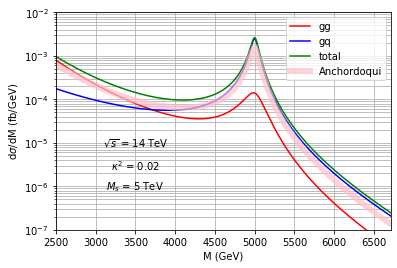

In [569]:
plt.switch_backend('agg')

fig, ax = plt.subplots()
plt.xlim(2500, invariant_Mass[len(invariant_Mass)-1])
plt.ylim(1e-7, 1e-2)
ax.set_yscale('log')

plt.plot(invariant_Mass, gg_cross, label = 'gg', color = 'red')
plt.plot(invariant_Mass, gq_cross, label = 'gq', color = 'blue')
plt.plot(invariant_Mass, total, label = 'total', color = 'green')
plt.plot(df_x, df_y, linewidth=6, color='pink', alpha=0.7, label = 'Anchordoqui')

plt.xlabel('M (GeV)')
plt.ylabel('d$\sigma$/dM (fb/GeV)')
plt.legend(loc='upper right')

plt.grid(True, which='both', axis='y')
plt.grid(True, which='both', axis='x')

plt.text(3500, 1e-5, '$\sqrt{s}$ = 14 TeV', fontsize=10, ha='center', va='center')
plt.text(3500, 3e-6, '$\kappa^2$ = 0.02', fontsize = 10, ha='center', va='center')
plt.text(3500, 1e-6, '$M_{s}$ = 5 TeV', fontsize = 10, ha='center', va='center')

plt.show()

plt.savefig('coupling 0.1.pdf',dpi=100,bbox_inches='tight')
print(len(total), len(comparison_points))
print(total[419], comparison_points[419])

In [575]:
# Ratio plot
plt.switch_backend('agg')

percentErr = []

for i in range(len(comparison_points)):
    percentErr.append( ((total[i]/comparison_points[i])-1))
    
plt.xlim(2500, 6700)

plt.ylabel('strings/Anchordoqui')
#plt.yticks(range(-1e-1, 9e-1, 1e-1))
plt.ylim(0.4,1)
plt.xlabel('Invariant Mass (GeV)')
plt.grid(True, which='both', axis='y')
plt.grid(True, which='both', axis='x')

plt.plot(invariant_Mass, percentErr)

plt.show()
plt.savefig('ratio plot for 0.1 coupling.pdf',dpi=100,bbox_inches='tight')
plt.clf()

<Figure size 432x288 with 0 Axes>

In [ ]:
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################

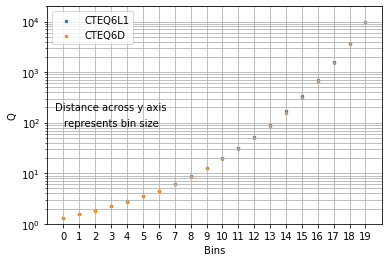

In [479]:
# Compare Q binning

qBinsL1 = [1.30000E+00, 1.53865E+00, 1.84636E+00, 2.24885E+00, 2.78358E+00, 3.50602E+00,
 4.50000E+00, 6.20054E+00, 8.81356E+00, 1.29625E+01, 1.97913E+01, 3.14839E+01,
 5.23915E+01, 9.15982E+01, 1.69063E+02, 3.31152E+02, 6.92354E+02, 1.55489E+03,
 3.77707E+03, 1.00000E+04]
qBinsD = [1.30000E+00, 1.53106E+00, 1.83098E+00, 2.22659E+00, 2.75766E+00, 3.48439E+00,
 4.50000E+00, 6.12359E+00, 8.60159E+00, 1.25127E+01, 1.89184E+01, 2.98475E+01,
 4.93546E+01, 8.59491E+01, 1.58477E+02, 3.11214E+02, 6.55142E+02, 1.48904E+03,
 3.68299E+03, 1.00000E+04]

binNumber = [x for x in range(0, 20)]

plt.switch_backend('agg')
fig, ax = plt.subplots()
ax.set_yscale('log')
plt.ylim(1, 2e4)
plt.xticks(range(0, 20, 1))
plt.grid(True, which='both', axis='y')
plt.grid(True, which='both', axis='x')

plt.scatter(binNumber, qBinsL1, label ='CTEQ6L1', s=6)
plt.scatter(binNumber, qBinsD, label ='CTEQ6D', s=6)

plt.xlabel('Bins')
plt.ylabel('Q')
plt.legend(loc='upper left')
plt.text(3, 2e2, 'Distance across y axis', fontsize=10, ha='center', va='center')
plt.text(3, 1e2, 'represents bin size', fontsize=10, ha='center', va='center')

plt.show()
plt.savefig('qBins.pdf')



In [557]:
########################################################################################################################## 
# RATIO PLOT TO COMPARE BEFORE AND AFTER T-CHANNEL BUG FIX

# Read the LHE lines.

gg_file = open('./CrossFiles/ggCross5MsBUGFIX.txt', 'r')
gq_file = open('./CrossFiles/gqCross5MsBUGFIX.txt', 'r')

gg_lines = gg_file.readlines()
gq_lines = gq_file.readlines()

gg_file.close()
gq_file.close()

print(len(gg_lines))

422


In [547]:
# Make array with gg_cross.txt.

gg_cross = []

i = 0    # counter

for line in enumerate(gg_lines):
    gg_cross.append(line[1])
    gg_cross[i] = float(gg_cross[i])
    i = i + 1
    
print(gg_cross[0])

0.00047641551452061876


In [548]:
# Make array with gq_cross.txt

spaces = []       # where the spaces are in each line.       
first, second, third, fourth, fifth, sixth = [], [], [], [], [], []         # the cross section for each quark flavour.

gq_cross = []

for line in enumerate(gq_lines):

    for i in range(len(line[1])):

        if line[1][i] == ' ':

            spaces.append(i)
        
i = 0                # counter

while i < (len(spaces)): 
    
    first.append(spaces[i]) 
    second.append(spaces[i+1]) 
    third.append(spaces[i+2]) 
    fourth.append(spaces[i+3]) 
    fifth.append(spaces[i+4]) 
    sixth.append(spaces[i+5]) 
    
    i = i + 6

q1, q2, q3, q4, q5 = [], [], [], [], []

i = 0                # counter

for line in enumerate(gq_lines): 
    
    q1.append(line[1][0 : first[i]])
    q1[i] = float(q1[i])
    
    q2.append(line[1][first[i]+1 : second[i]])
    q2[i] = float(q2[i])
    
    q3.append(line[1][second[i]+1 : third[i]])
    q3[i] = float(q3[i])
    
    q4.append(line[1][third[i]+1 : fourth[i]])
    q4[i] = float(q4[i])
    
    q5.append(line[1][fourth[i]+1 : fifth[i]])
    q5[i] = float(q5[i])
 
    gq_cross.append(q1[i] + q2[i] + q3[i] + q4[i] + q5[i])

    i = i + 1
    
print(gg_cross[0])

0.00047641551452061876


In [550]:
# Make the total array

totalBF = []

for i in range(len(gg_cross)):
    totalBF.append(gg_cross[i] + gq_cross[i])

In [558]:
# Find ratios 

ratio = []

for i in range(len(totalBF)):
    ratio.append(totalBF[i]/total[i])

# print(ratio)

In [553]:
plt.xlim(2500, 6700)
plt.ylim(-50, 50)

plt.ylabel('% Error: After Fix/Before')
plt.yticks(range(-10, 90, 10))
plt.xlabel('Invariant Mass (GeV)')
plt.grid(True, which='both', axis='y')
plt.grid(True, which='both', axis='x')

plt.plot(invariant_Mass, ratio)

plt.show()
plt.savefig('ratio plot for bugfix.pdf',dpi=100,bbox_inches='tight')
plt.clf()

<Figure size 432x288 with 0 Axes>